# Introduction

There are two main types of recomendation systems 

* **Collaborative filtering** makes recommendations based on users' attitude towards items 
* **Content-based** makes recommendations based on the similarity between attributes of the items 

There are two types of collaborative filtering. 
* **User-item filtering**, where the recommendation is made by taking a user and finding other users who rated movies similarly.
* **Item-item filtering**, where the recommendation is made by taking an item and finding other items that were rated similarly by other users. 

In other words, 
* User-item filtering: "Users similar to you also liked..."
* Item-item filtering: "Users who liked this item also liked..."

Here we will implement Item-item filtering using the Movie Lens dataset.

The Move Lens dataset is available here: https://grouplens.org/datasets/movielens/

*This recommender system was made with the help of Jose Portilla's 'Python for Data Science and Machine Learning Bootcamp' course on Udemy*

The libraries we need:

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

and so we can show plots inline:

In [133]:
%matplotlib inline

# 2. Import the data

In [134]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [135]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [136]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [137]:
df = pd.merge(left=movies, right=ratings, on='movieId')
df = df.drop(columns='genres')
df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


# 3. Exploratory data analysis

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
movieId      100836 non-null int64
title        100836 non-null object
userId       100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ MB


In [139]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


The dataset contains each user's individual rating for each moive (0.5-5 in steps of 0.5).

Let's group the movies by their title and display the mean rating and number of ratings for each

In [140]:
grouped_ratings_df = pd.DataFrame(df.groupby(by='title')['rating'].mean())
grouped_ratings_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


And add on the number of ratings

In [141]:
grouped_ratings_df['no. of ratings'] = pd.DataFrame(df.groupby(by='title')['rating'].count())
grouped_ratings_df.head()

,rating,no. of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [142]:
grouped_ratings_df.sort_values(by='rating').head()

,rating,no. of ratings
title,,
Rust and Bone (De rouille et d'os) (2012),0.5,1
The Emoji Movie (2017),0.5,1
The Butterfly Effect 3: Revelations (2009),0.5,1
"Follow Me, Boys! (1966)",0.5,1
The Beast of Hollow Mountain (1956),0.5,1


In [143]:
grouped_ratings_df.sort_values(by='rating', ascending=False).head()

,rating,no. of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


Clearly the best and worst rated movies don't have many ratings each.

The most rated movies:

In [144]:
grouped_ratings_df.sort_values(by='no. of ratings', ascending=False).head(10)

,rating,no. of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Let's have a closer look through some plots

In [145]:
sns.set_style('whitegrid')

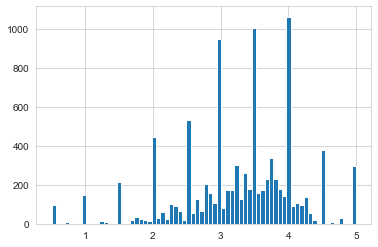

In [146]:
grouped_ratings_df['rating'].hist(bins=70)

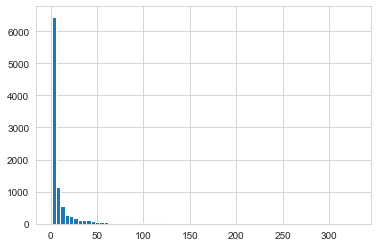

In [147]:
grouped_ratings_df['no. of ratings'].hist(bins=70)

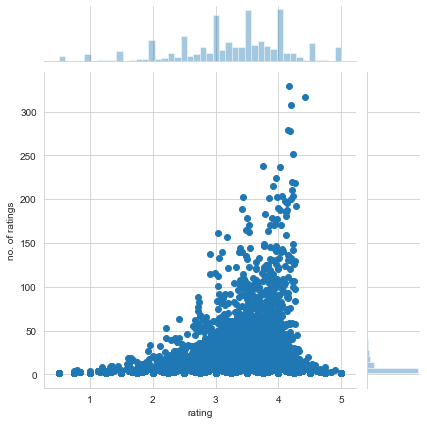

In [148]:
sns.jointplot(x='rating', y='no. of ratings', data=grouped_ratings_df)

So the ratings are distributed around ca. 3.7 and there are many more movies with a low number of ratings than a high number.
There is also a spike in the number of movies with ratings in multiples of 0.5

# 4. The recommender system

First we need a user-item matrix, with users as rows and movie ttles as columns.

This shows the rating each user gave to each movie in one matrix. Note that most of the matrix is empty as most users have not seen most movies.

In [149]:
moviematrix = df.pivot_table(values='rating', index='userId', columns='title')
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we're going to calculate the similarity between the ratings of a movie we choose and all other movies. Let's choose The Matrix

First, we get the user ratings for The Matrix

In [150]:
matrix_ratings = moviematrix['Matrix, The (1999)']
matrix_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

Then we find the similaritly between the use ratings for The Matrix and all the other movies using the corrwith() method.

In [151]:
similarity_w_matrix = moviematrix.corrwith(matrix_ratings)
similarity_w_matrix.head()

C:\Users\Benjamin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Benjamin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [152]:
len(similarity_w_matrix)

9719

Next, we clean the resulting matrix by removing NaN values and converting the Series into a data frame

In [153]:
similarity_w_matrix = pd.DataFrame(similarity_w_matrix.dropna(),columns=['Similarity to The Matrix'])
similarity_w_matrix.head()

,Similarity to The Matrix
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [154]:
similarity_w_matrix.sort_values('Similarity to The Matrix', ascending=False).head()

,Similarity to The Matrix
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
Monsieur Ibrahim (Monsieur Ibrahim et les fleurs du Coran) (2003),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0


Now, clearly some obscure movies have a very similar rating to The Matrix. Ths is might be because they don't have a large number of ratings. Let's check:

In [155]:
similarity_w_matrix = similarity_w_matrix.join(grouped_ratings_df['no. of ratings'])

In [156]:
similarity_w_matrix.sort_values('no. of ratings', ascending=False)

,Similarity to The Matrix,no. of ratings
title,,
Forrest Gump (1994),0.280199,329
"Shawshank Redemption, The (1994)",0.284825,317
Pulp Fiction (1994),0.330602,307
"Silence of the Lambs, The (1991)",0.286222,279
"Matrix, The (1999)",1.000000,278
Star Wars: Episode IV - A New Hope (1977),0.324533,251
Jurassic Park (1993),0.427936,238
Braveheart (1995),0.496045,237
Terminator 2: Judgment Day (1991),0.314164,224


So let's limit the number of ratings to  more than 60

In [157]:
similarity_w_matrix = similarity_w_matrix[similarity_w_matrix['no. of ratings']>60]

And so, users who liked The Matrix also liked...

In [158]:
similarity_w_matrix.sort_values('Similarity to The Matrix', ascending=False).head(10)

,Similarity to The Matrix,no. of ratings
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145
"Matrix Reloaded, The (2003)",0.522551,96
Inception (2010),0.514767,143
"Piano, The (1993)",0.497214,61
